# Week 07: Linear and logistic regression
### Introduction

This week, we will get some first-hand experience with regression.
We will implement gradient descent for linear regression. Then we will proceed to classification, first by using linear regression and then logistic regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## NumPy
We will first familiarize ourselves a little with NumPy. A function which we will use over again is `linspace(x1,x2,N)` which makes a vector of length $N$ splitting the interval $[x1,x2]$ into equally sized intervals.

In [2]:
x = np.linspace(-5,5,100)
x[:10]

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909])

One of the major improvements from using NumPy is the possibilty of computing many values by applying a function to a numpy array.

In [3]:
y1 = -6*x**3 + x**2 -3*x + 5 

In [4]:
a = np.arange(5)
print(a)
print(type(a))
b = np.array([3,4,5,6,7])


print(a+b)

[0 1 2 3 4]
<class 'numpy.ndarray'>
[ 3  5  7  9 11]


`y1`will contain the corresponding function values for each element `x`in `xx`. We may plot the result.

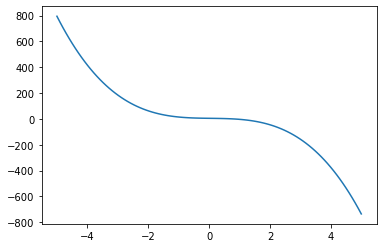

In [5]:
plt.plot(x,y1)

## Dataset for linear regression
We will start with a smooth curve and add some "noise". The underlying idea is that the smooth curve represents the function we are looking for, and that this is the best we can hope to learn. A solution which does better  on the training material than the smooth curve is probably overfit and will not generalize as well to new data as the smooth curve. We are using a normal distribution to generate noise. The numpy function `normal` will generate a vector of `size` many random points around `loc` from a distribution with standard deviation `scale`.

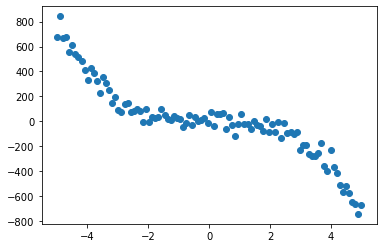

In [6]:
from numpy.random import normal
t = y1 + normal(loc=0, scale=50, size=100)
plt.scatter(x, t)

Our training data now consists of pairs (xx[i], t[i]), where xx[i] is the datapoint and t[i] the target value. So far, both `xx` and `t` are vectors. Check their shapes, e.g., `xx.shape`. The goal is to make an implementation for linear regression which works with an arbitrary number of input variables and not just one. We will therefore transform `xx` to a matrix of dimension $M\times n$ where each row represents one datapoint, and n is the number of input variables (or features). Check the shape of `X` after the transform.

In [7]:
X = x.reshape(-1,1)
print(f"Before reshape: {x.shape}")
print(f"After reshape:  {X.shape}")

np.arange(9).reshape(3,3)

Before reshape: (100,)
After reshape:  (100, 1)


array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

## Part A: Linear regression

We will implement our own linear regression model. Our aim is to find an approximate function that fits the data generated above.

Since we are dealing with only one input variable, we start with a simple linear function, $f(x_1) = w_0 + w_1x_1$.

### Exercise 1: MSE

We wonder if our $f$ fits the data well, and what parameters will give us the best approximation. We will estimate this using the Mean Squared Error:

$\frac{1}{N} \sum_{j=1}^{N} (t_j - \sum_{i=0}^{m} w_ix_{ji})^2$

Write a function calculating MSE of our approximation.

In [8]:
# Your code here

def MSE(y_true, y_pred):
    # error = y_true - y_pred
    # square_error = error**2
    # mean_square_error = square_error.mean()
    # return mean_square_error
    return ((y_true - y_pred)**2).mean()

### Exercise 2: Testing the MSE
To test our implementation, we can take the function $f(x_1)=0$ as a baseline and calculate the MSE for this $f$. Also calculate the Root Means Square Error which provides a more natural measure for how good the fit is.

In [9]:
hypothesis = np.zeros(x.shape[0])
error = MSE(hypothesis, x)

print(f"MSE:  {error}")
print(f"RMSE: {np.sqrt(error)}")

MSE:  8.501683501683502
RMSE: 2.9157646512850626


### Exercise 3: Adding bias

We will implement linear regression with gradient descent and test it on the data. To make it simple, we will add a $x_0=1$ to all our datapoints, and consider $f(x_1) = w_0 + w_1x_1$ as $f(x_0, x_1) = w_0x_0+ w_1x_1$. Make a procedure that does this.

In [10]:
def add_bias(X):
    """X is a Nxm matrix: N datapoints, m features
    Return a Nx(m+1) matrix with added bias in position zero"""

    bias = np.ones((X.shape[0], 1)) # Give it a second axis to align the concatenation
    return np.concatenate((bias, X), axis=1)

### Exrcise 4: Gradient Descent
We will implement the linear regression in a class as we did with the classifiers earlier. The fit method will run the gradient descent step a number of times to train the classifier. The predict method should take a matrix containing several data points and predict the outcome for all of them. Fill in the methods.

Assume that the matrix of training data are not extended with bias features. Hence, make adding bias a part of your methods.

After training there should be an attribute with learned coeffecients (weights) which is applied by the predict method.


In [11]:
class LinReg():

    def fit(self, X_train, t_train, eta = 0.1, epochs=10):
        """X_train is a Nxm matrix, N data points, m features
        t_train are the targets values for training data"""

        X = add_bias(X_train)
        N, m = X.shape

        self.weights = np.zeros(m)

        for _ in range(epochs):
            self.weights -= eta/N * X.T @ (X @ self.weights - t_train)
        
    
    def predict(self, X):
        """X is a Kxm matrix for some K>=1
        predict the value for each point in X"""
        return add_bias(X) @ self.weights


    def get_weights(self):
        return self.weights


### Exercise 5: Train and test the model
Fit the model to the training data. Report the coefficients. Plot the line together with the observations. Calculate the RMSE. Is the result a better fit than the baseline constant function $f(x)=0$.

In [12]:
reg = LinReg()
reg.fit(X, t, eta = 0.1, epochs=100)
print(f"weights: {reg.get_weights()}")

weights: [  8.37710529 -93.20285026]


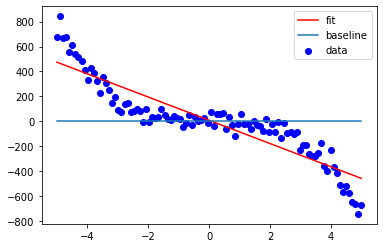

In [13]:
plt.plot(X, reg.predict(X), color="red", label="fit")
plt.plot((-5,5), (0,0), label="baseline")
plt.scatter(X, t, color="blue", label="data")
plt.legend()
plt.show()

In [14]:
error = MSE(t, reg.predict(X))
print(f"MSE:  {error}")
print(f"RMSE: {np.sqrt(error)}")


MSE:  16483.23416907206
RMSE: 128.38704829176524


## Dataset for classification
We will use simple synthetic data similarly to week_05, but we will make the set a little bigger  to get more reliable results.

In [15]:
from sklearn.datasets import make_blobs
X_train, y_train = make_blobs(n_samples=500, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2019)
X_test, y_test = make_blobs(n_samples=500, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2020)

In [16]:
def show(X, y, marker='.'):
    labels = set(y)
    for lab in labels:
        plt.plot(X[y == lab][:, 1], X[y == lab][:, 0],
                 marker, label="class {}".format(lab))
    plt.legend()

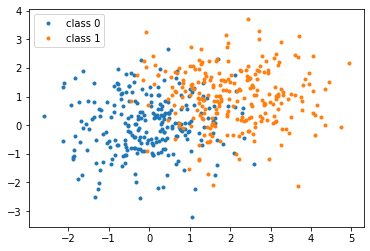

In [17]:
show(X_train, y_train)

## Linear Regression classifier
This is also called Ridge Classifier in the literature when it is smoothed. We will consider the simple unsmoothed version here and return to smoothing and regularization in a later lecture.

In [18]:
class Classifier():

    def accuracy(self, X_test, y_test):
        y_pred = self.predict(X_test)

        return (y_pred == y_test).mean()


### Exercise 6: Coding the classifier
Make a linear regression classifier.

In [19]:
class LinReg(Classifier):
    def fit(self, X_train, y_train, eta=0.1, epochs=10):

        X = add_bias(X_train)
        N, m = X.shape

        self.weights = np.zeros(m)

        for _ in range(epochs):
            self.weights -= eta/N * X.T @ ((X@self.weights)-y_train)

    # Add threshold
    def predict(self, x, threshold=0.5):
        return (add_bias(x) @ self.weights) > threshold




### Exercise 7: Experiment
We will conduct repeated testing. We therefore need a development test set different from the final test set. Make such a set X_dev, y_dev, similarly to X_test, y_test using random_state=2021. Train the classfier on X_train, y_train and test for accuracy on X_dev, y_dev.

In [25]:
from sklearn.datasets import make_blobs
X_dev, y_dev = make_blobs(n_samples=500, centers=[[0,0],[1,2]], 
                n_features=2, random_state=2021)

classifier = LinReg()
classifier.fit(X_train, y_train)
print(classifier.accuracy(X_dev, y_dev))

0.864


## Logistic Regression

### Exercise 8: The logistic function
Implement the logistic function. Sometimes called only the sigmoid.

In [21]:
def logistic(x):
    return 1/(1+np.exp(-x))

### Exercise 9: Code for the classifier
Write code for the logistic regression classifier. Compared to linear regression classifier you have to make adaptions to both fit and predict taking the logistic into consideration


In [22]:
class LogReg(Classifier):
    def forward(self, X):
        return logistic(X @ self.weights)

    def fit(self, X_train, y_train, eta=0.1, epochs=10):

        X = add_bias(X_train)
        N, m = X.shape

        self.weights = np.zeros(m)

        for _ in range(epochs):
            self.weights -= eta/N * X.T @ (self.forward(X)-y_train)

    # Add threshold
    def predict(self, x, threshold=0.5):
        X = add_bias(x)
        return self.forward(X) > threshold




### Exercise 10: Initial experiments
Train the classfier on X_train, y_train and test for accuracy on X_dev, y_dev.

In [26]:
classifier = LogReg()
classifier.fit(X_train, y_train)
print(classifier.accuracy(X_dev, y_dev))

0.752


### Exercise 11: Repeated experimentation
Did you get better results than with the linear regression classifier? That does not necessary have to be the case for this data set. But, if your result is much inferior to the linear regression classifier, the reason might be the parameter settings. Experiment with the parameter values for the learning rate and the number of epochs to get an optimal result.

In [24]:
for epochs in [1, 2, 5, 10, 50, 100, 1000]:
    for rate in [0.01, 0.05, 0.1, 0.2, 0.5]:
        log_classifier = LogReg()
        log_classifier.fit(X_train, y_train, epochs = epochs, eta = rate)
        print("Learning rate: {:5}, Epochs: {:7}, Accuracy: {}".format(
            rate, epochs, log_classifier.accuracy(X_dev, y_dev)
            ))

Learning rate:  0.01, Epochs:       1, Accuracy: 0.74
Learning rate:  0.05, Epochs:       1, Accuracy: 0.74
Learning rate:   0.1, Epochs:       1, Accuracy: 0.74
Learning rate:   0.2, Epochs:       1, Accuracy: 0.74
Learning rate:   0.5, Epochs:       1, Accuracy: 0.74
Learning rate:  0.01, Epochs:       2, Accuracy: 0.74
Learning rate:  0.05, Epochs:       2, Accuracy: 0.74
Learning rate:   0.1, Epochs:       2, Accuracy: 0.742
Learning rate:   0.2, Epochs:       2, Accuracy: 0.746
Learning rate:   0.5, Epochs:       2, Accuracy: 0.746
Learning rate:  0.01, Epochs:       5, Accuracy: 0.74
Learning rate:  0.05, Epochs:       5, Accuracy: 0.746
Learning rate:   0.1, Epochs:       5, Accuracy: 0.744
Learning rate:   0.2, Epochs:       5, Accuracy: 0.752
Learning rate:   0.5, Epochs:       5, Accuracy: 0.794
Learning rate:  0.01, Epochs:      10, Accuracy: 0.742
Learning rate:  0.05, Epochs:      10, Accuracy: 0.744
Learning rate:   0.1, Epochs:      10, Accuracy: 0.752
Learning rate:   0

## End of week 07